In [2]:
pip install pandas scikit-learn matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Sample Data:
   received packets  IAT_Mean   IAT_Std   IAT_Max   IAT_Min  \
0               320  0.006244  0.006325  0.020491  0.000163   
1               310  0.006445  0.006329  0.020491  0.000163   
2               250  0.007991  0.006360  0.021895  0.001201   
3               527  0.003792  0.003872  0.023358  0.000163   
4               601  0.003325  0.002850  0.013124  0.000163   

   received_addresses  max_pkt_from_sameId  has_attacker  
0                  16                   20             0  
1                  16                   20             0  
2                  13                   20             0  
3                  35                   20             0  
4                  32                   20             0  

Basic Stats:
       received packets   IAT_Mean    IAT_Std    IAT_Max    IAT_Min  \
count         18.000000  18.000000  18.000000  18.000000  18.000000   
mean         251.777778   0.138005   0.024037   0.207641   0.120625   
std          203.446931   0

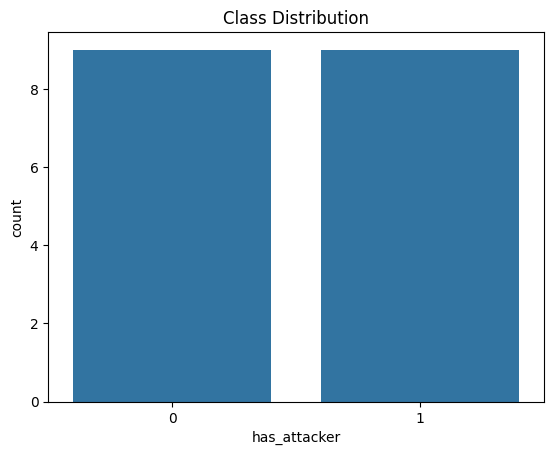


Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6


Confusion Matrix:
[[2 1]
 [1 2]]


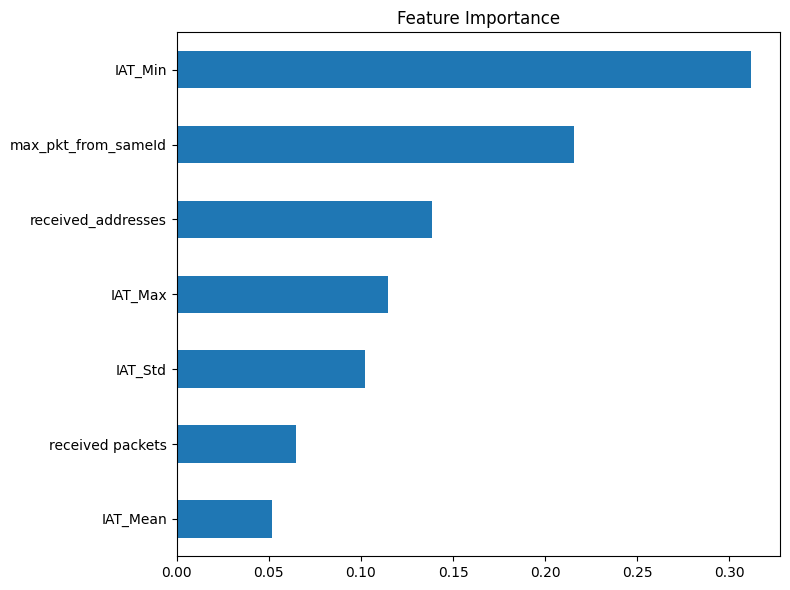

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# === Step 1: Load the dataset ===
file_path = 'Dataset_timewin_28.json'  

# Read JSON lines
with open(file_path, 'r') as f:
    data = [json.loads(line) for line in f]

# Convert to DataFrame
df = pd.DataFrame(data)

print("Sample Data:")
print(df.head())

# === Step 2: Exploratory Analysis (Optional) ===
print("\nBasic Stats:")
print(df.describe())

sns.countplot(x='has_attacker', data=df)
plt.title('Class Distribution')
plt.show()

# === Step 3: Preprocessing ===

# Drop columns not needed (if any)
# For now, use all numeric features except the label
X = df.drop(columns=['has_attacker'])
y = df['has_attacker']

# === Step 4: Train-Test Split ===
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# === Step 5: Train ML Model ===
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# === Step 6: Evaluate ===
y_pred = clf.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# === Step 7: Feature Importance Plot ===
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Feature Importance')
plt.tight_layout()
plt.show()